In [178]:
import pandas as pd
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np
% matplotlib inline

## Задание 9
# Исследование точности решения однородной граничной задачи для уравнения Шредингера методом Галеркина
Был написан make файл для предоставленных программ и произведена компиляция и запуск программы `l9p1.f90` при различных значениях порядка B-сплайнов $K\in\{1,4, ...,15\}$. Значения собственных значений записывались в словарь а затем выведены в виде таблицы и графика.

In [52]:
vals = {}
for k in range(3, 16):
    with open('l9p1.f90', "r") as f:
        lines = list((line.rstrip() for line in f))
        lines[1] = "INTEGER,PARAMETER:: KORD = " + str(k)
    with open('l9p1.f90', "w") as f:
        f.write('\n'.join(lines) + '\n')
    ! "./make"
    cmd = subprocess.Popen("./l9p1.exe", shell=True, stdout=subprocess.PIPE)
    lines = list(cmd.stdout)
    assert int(lines[-11].split()[-1])==k 
    print('K =', k)
    vals[k] = list(map(lambda x: float(x.split()[-1]), list(lines)[-10:]))

K = 3
K = 4
K = 5
K = 6
K = 7
K = 8
K = 9
K = 10
K = 11
K = 12
K = 13
K = 14
K = 15


In [93]:
vals_table = pd.DataFrame(vals)
vals_table.columns = columns=list(map(lambda x:"K="+str(x), list(range(1, 16))))
vals_table.index = columns=list(map(lambda x:"Собственное значение "+str(x), list(range(1, 11))))
vals_table

,K=1,K=2,K=3,K=4,K=5,K=6,K=7,K=8,K=9,K=10,K=11,K=12,K=13,K=14,K=15
Собственное значение 1,-2.758726,-4.713054,-0.998915,-0.999991,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
Собственное значение 2,-1.613751,-2.051996,-0.249888,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000
Собственное значение 3,-1.144975,-1.343500,-0.111078,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111,-0.111111
Собственное значение 4,-0.888111,-1.001905,-0.062486,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500,-0.062500
Собственное значение 5,-0.725640,-0.799495,-0.039993,-0.040000,-0.040000,-0.040000,-0.040000,-0.040000,-0.040000,-0.040000,-0.040000,-0.040000,-0.040000,-0.040000,-0.040000
Собственное значение 6,-0.613520,-0.665344,-0.027733,-0.027737,-0.027737,-0.027737,-0.027737,-0.027737,-0.027737,-0.027737,-0.027737,-0.027737,-0.027737,-0.027737,-0.027737
Собственное значение 7,-0.531455,-0.569833,-0.019189,-0.019193,-0.019193,-0.019193,-0.019193,-0.019193,-0.019193,-0.019193,-0.019193,-0.019193,-0.019193,-0.019193,-0.019193
Собственное значение 8,-0.468776,-0.498343,-0.009321,-0.009326,-0.009326,-0.009326,-0.009326,-0.009326,-0.009326,-0.009326,-0.009326,-0.009326,-0.009326,-0.009326,-0.009326
Собственное значение 9,-0.419335,-0.442814,0.003318,0.003312,0.003312,0.003312,0.003312,0.003312,0.003312,0.003312,0.003312,0.003312,0.003312,0.003312,0.003312
Собственное значение 10,-0.379335,-0.398431,0.018541,0.018534,0.018533,0.018533,0.018533,0.018533,0.018533,0.018533,0.018533,0.018533,0.018533,0.018533,0.018533


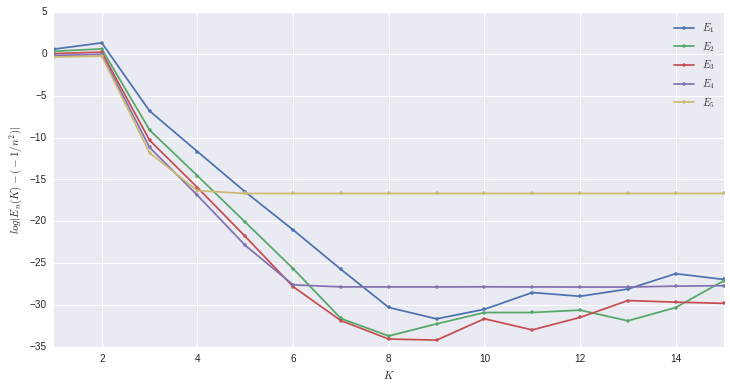

In [186]:
plt.figure(figsize=(12, 6))
for k in range(5):
    plt.plot(np.arange(1, 16, 1), np.log(abs(vals_table.values[k,:]+1/(k+1)**2)), '.-')
plt.xlim(1, 15)
plt.legend(list(map(lambda x: '$E_'+str(x) + '$',range(1, 7))))
plt.ylabel('$log|E_n(K) - (-1/n^2)|$')
plt.xlabel('$K$')

Выше представлен график для зависимости логарифма ошибки $log(|E_n(K) - (-1/n^2)|)$ от порядка сплайна $K$. Первые два значения $K$ - кажутся неверно рассчитанными. Далее для всех собственных значений виден наклон равный примерно -5. После чего происходит насыщение, что скорее всего связано с ограниченной машинной точностью.